# Prediction using Supervised ML

## Predict the percentage of an student based on the no. of study hours.

## **Krishani Virendra Desai**

### Importing all libraries required

In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics  
%matplotlib inline

### Reading data from remote link

In [3]:

url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Plotting the distribution of scores in order to check linear relationship

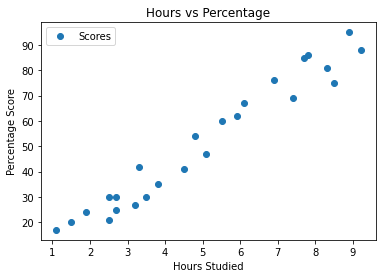

In [3]:
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### **Preparing the data**

X is the independent variable and y is the dependent variable

In [4]:
X = df.iloc[:, :-1].values.reshape(-1,1)
y = df.iloc[:, 1].values.reshape(-1,1)

### Dataset is divided into 80% training set and 20% testing set

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [6]:
#Training the Algorithm 
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Trained the model.")

Trained the model.


### Plotting the regression line

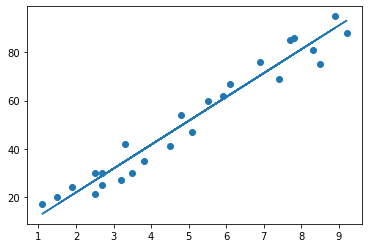

In [7]:
line = regressor.coef_*X+regressor.intercept_
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [8]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### Comparing Actual vs Predicted

In [9]:
df1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})  
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Visualizing the comparison

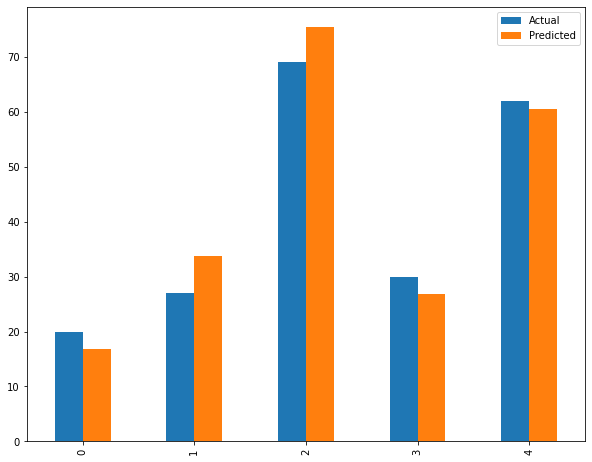

In [10]:
df1.plot(kind='bar',figsize=(10,8))
plt.show()

### Testing with own data

In [11]:
#Studying hours is 9.25,determine the score
own_pred = regressor.predict([[9.25]])
print("Predicted Score = {}".format(own_pred[0]))

Predicted Score = [93.69173249]


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. 

In [12]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 value:',metrics.r2_score(y_test,y_pred)) 

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R2 value: 0.9454906892105356
